In [167]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
laptop_df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv")

In [170]:
laptop_df.tail(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [4]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
laptop_df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [6]:
laptop_df.head(2)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [7]:
laptop_df["Company"].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [8]:
for i in laptop_df.columns:
    print(laptop_df[i].value_counts())

Unnamed: 0
0       1
856     1
874     1
873     1
872     1
       ..
433     1
432     1
431     1
430     1
1302    1
Name: count, Length: 1303, dtype: int64
Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64
ScreenResolution
Full HD 1920x1080        

In [9]:
laptop_df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [10]:
laptop_df.duplicated().sum()

0

In [11]:
laptop_df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [12]:
laptop_df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232


In [13]:
laptop_df["Ram"]=laptop_df["Ram"].str.replace("GB","")

In [14]:
laptop_df["Ram"]=laptop_df["Ram"].astype("int32")

In [15]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


In [16]:
laptop_df["Weight"]=laptop_df["Weight"].str.replace("kg","").astype("float32")

In [17]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [18]:
sns.set_theme()

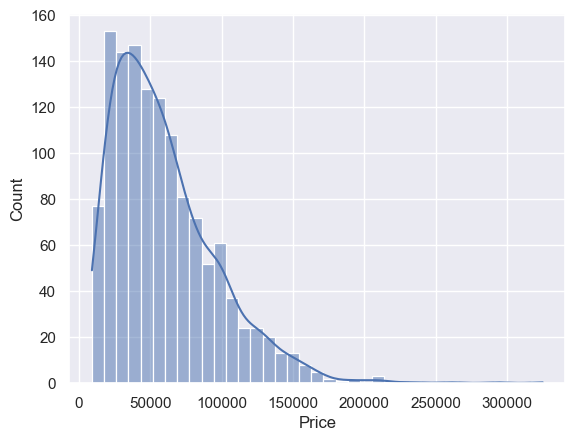

In [19]:
sns.histplot(x=laptop_df["Price"],kde=True)
plt.show()

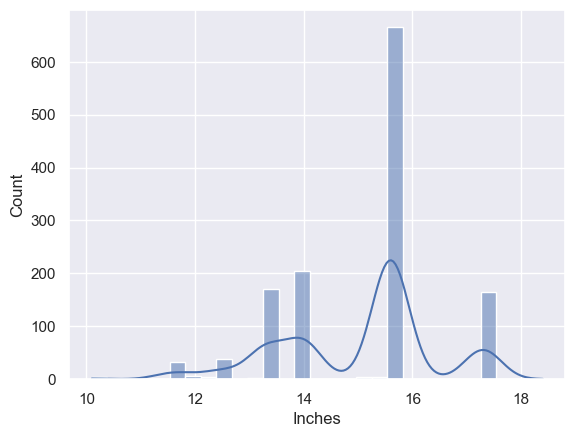

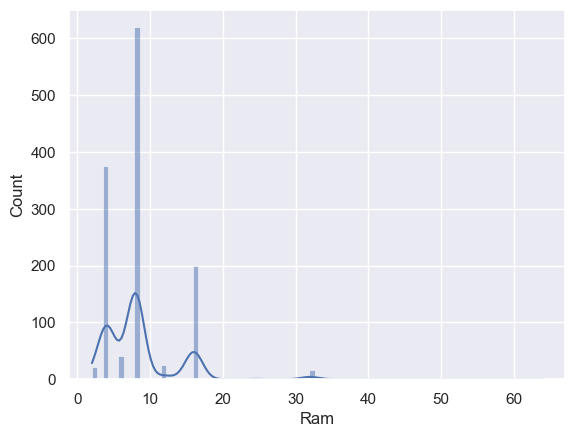

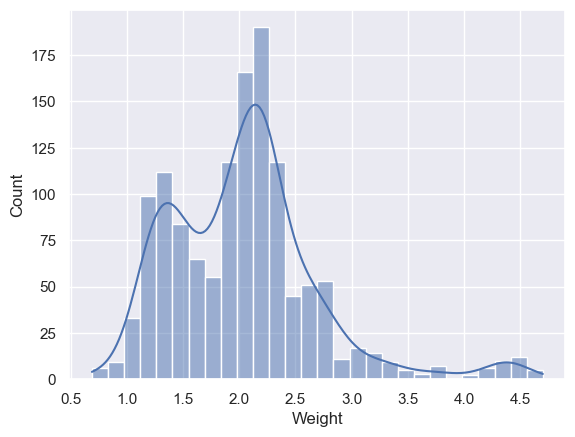

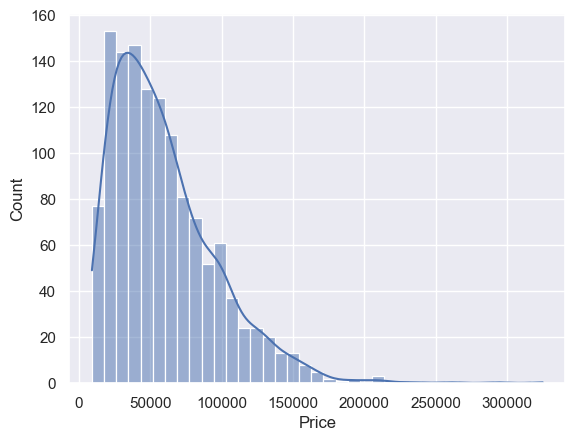

In [20]:
for i in laptop_df.columns:
    if laptop_df[i].dtype!="O":
        sns.histplot(x=laptop_df[i],kde=True)
        plt.show()
        

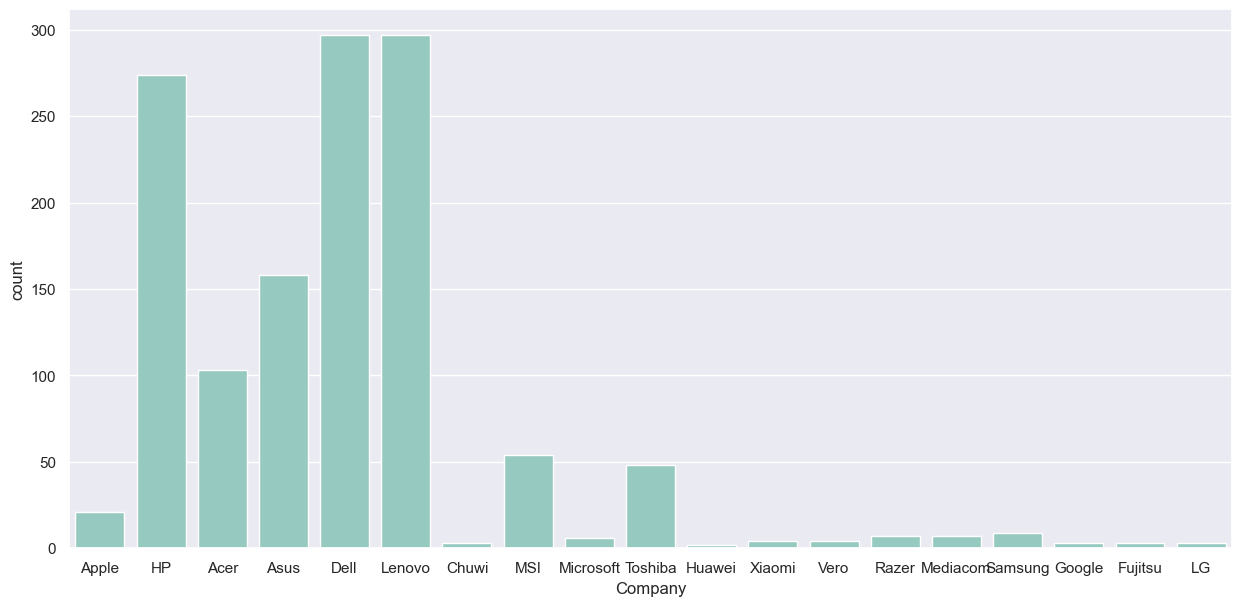

In [21]:
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.countplot(x=laptop_df["Company"])
plt.show()
        

<Axes: xlabel='Company', ylabel='Price'>

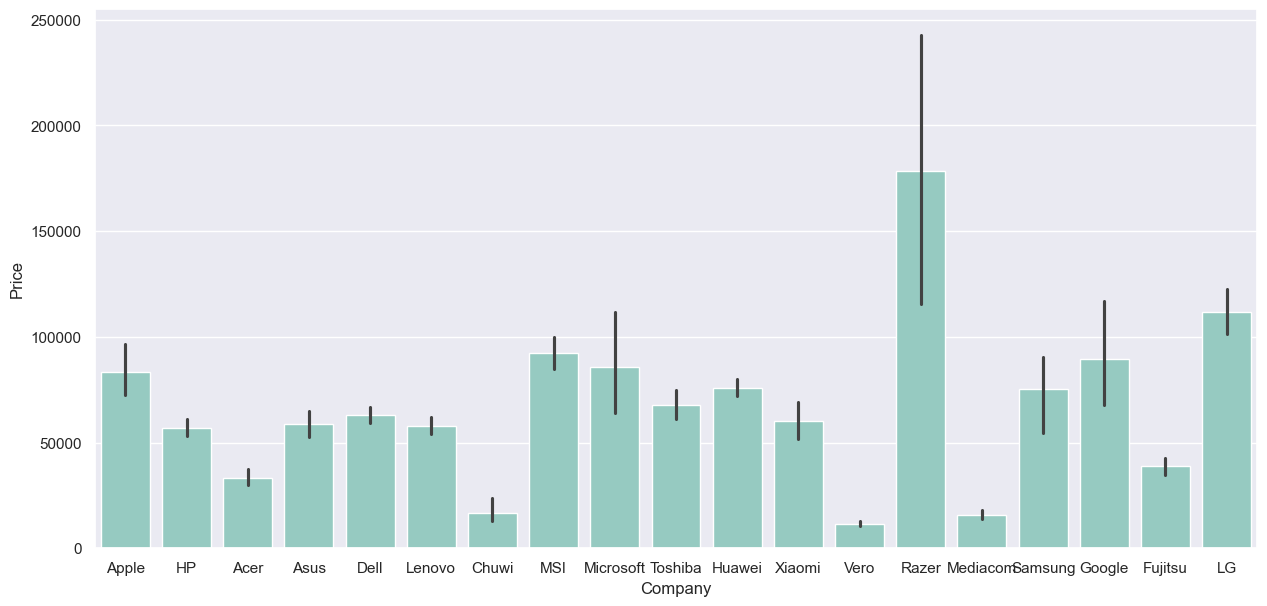

In [22]:
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.barplot(x=laptop_df["Company"],y=laptop_df["Price"])

<Axes: xlabel='TypeName', ylabel='Price'>

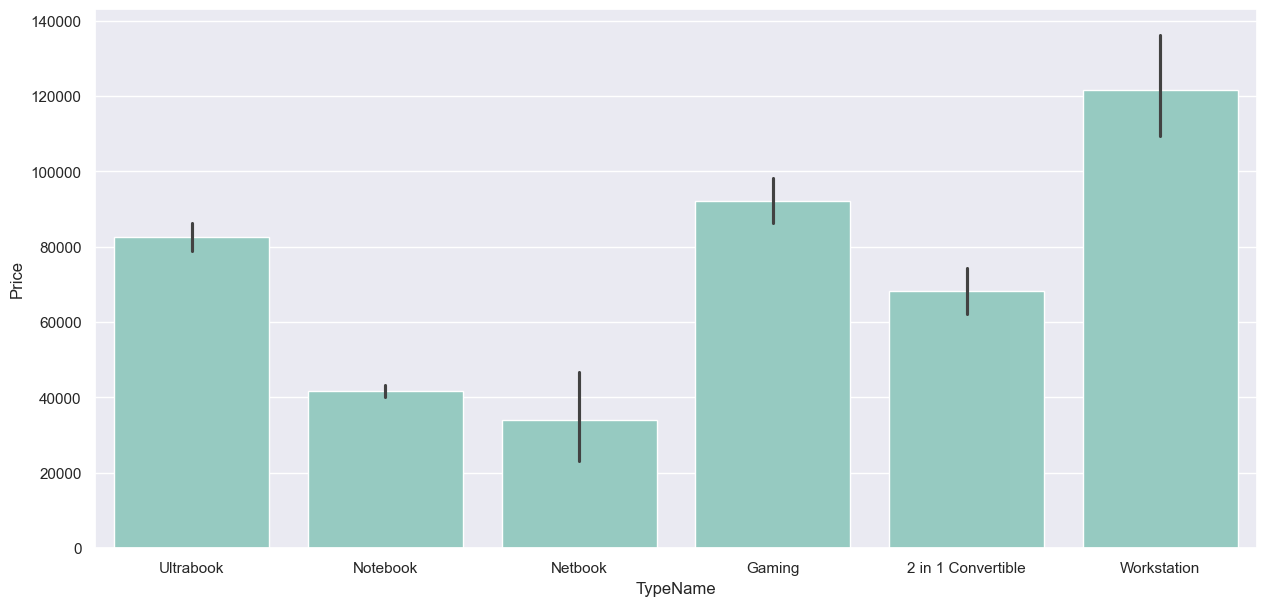

In [23]:
sns.set_palette("Set3")
plt.figure(figsize=(15,7))
sns.barplot(x=laptop_df["TypeName"],y=laptop_df["Price"])

<Axes: xlabel='TypeName', ylabel='count'>

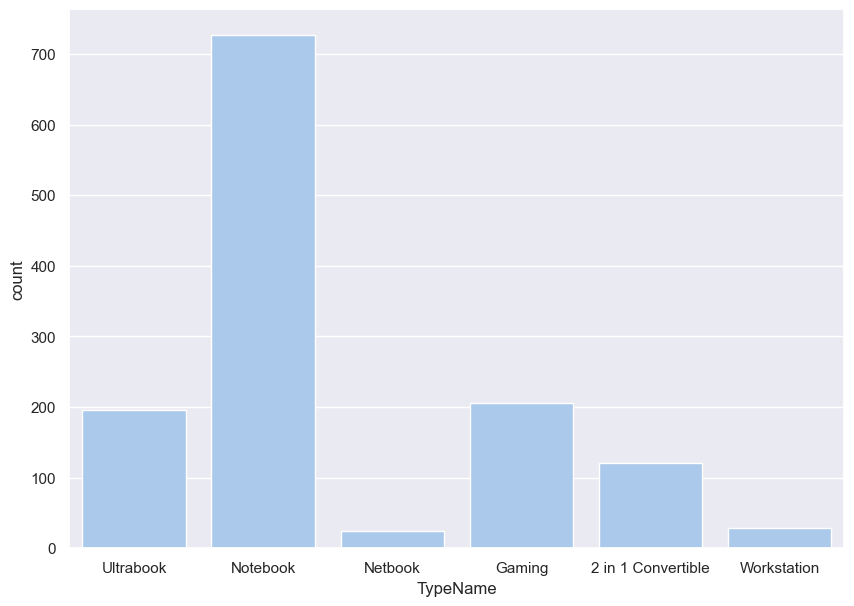

In [24]:
sns.set_palette("pastel")
plt.figure(figsize=(10,7))
sns.countplot(x=laptop_df["TypeName"])

791


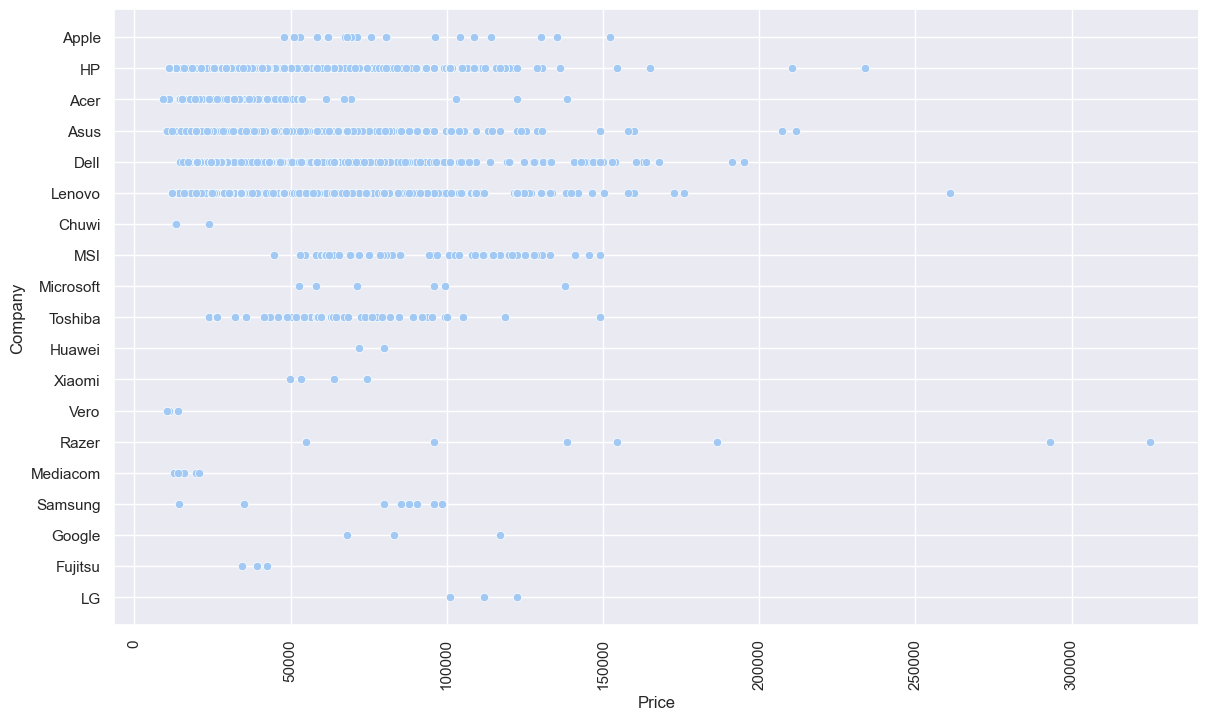

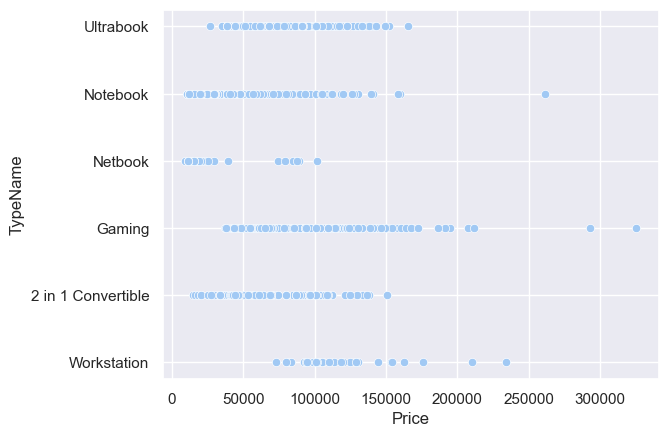

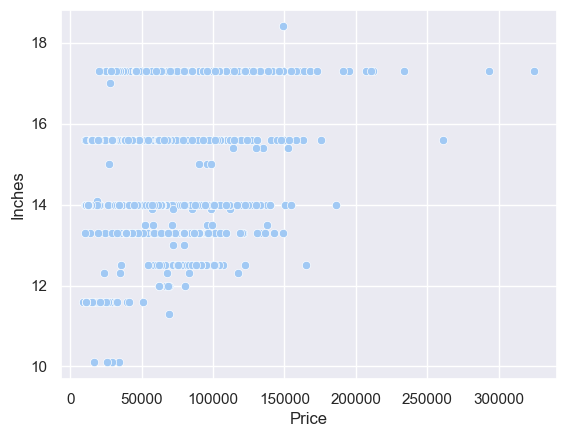

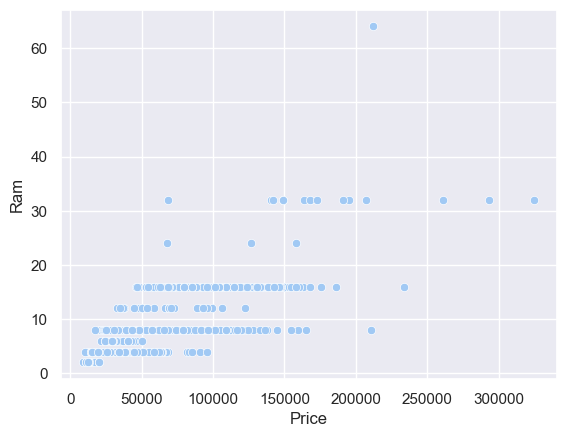

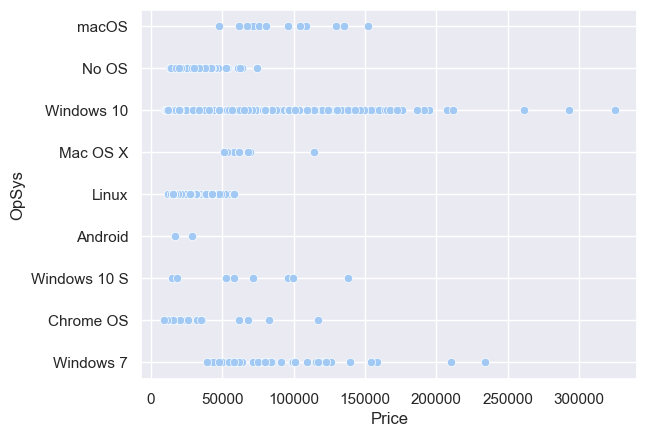

In [25]:
sns.set_palette("pastel")
print(len(laptop_df[i].unique()))
plt.figure(figsize=(14,8))
plt.xticks(rotation="vertical")

for i in laptop_df.columns:
        if i!="Price" and len(laptop_df[i].unique())<=20:    
            sns.scatterplot(y=laptop_df[i],x=laptop_df["Price"])
            plt.show()
            

In [26]:
laptop_df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [27]:
laptop_df["TouchScreen"]=laptop_df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [28]:
laptop_df["TouchScreen"].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

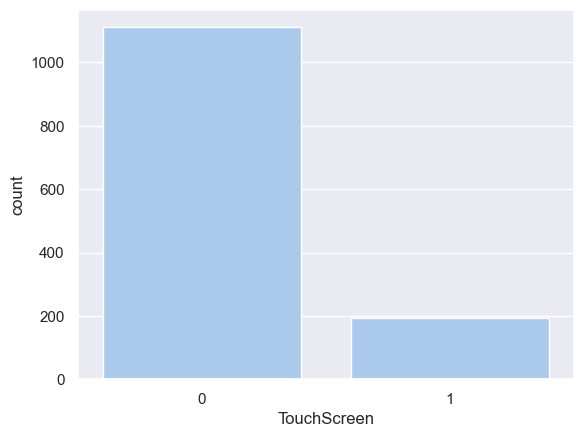

In [29]:
sns.countplot(x=laptop_df["TouchScreen"])
plt.show()

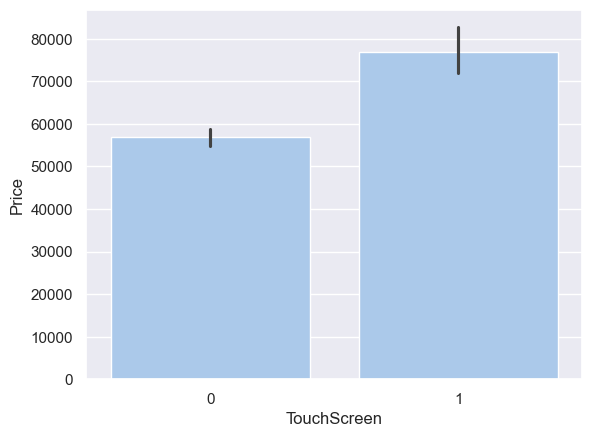

In [30]:
sns.barplot(x=laptop_df["TouchScreen"],y=laptop_df["Price"])
plt.show()

In [31]:
laptop_df["IPS"]=laptop_df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

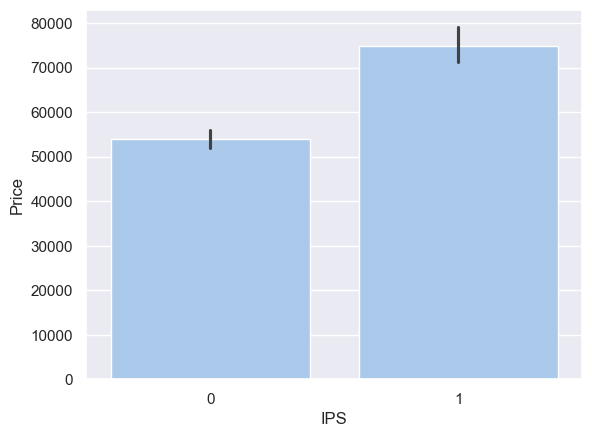

In [32]:
sns.barplot(x=laptop_df["IPS"],y=laptop_df["Price"])
plt.show()

In [33]:
new=laptop_df["ScreenResolution"].str.split("x",n=1,expand=True)

In [34]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [35]:
laptop_df["X_res"]=new[0]
laptop_df["Y_res"]=new[1]

In [36]:
laptop_df["X_res"]=laptop_df["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
laptop_df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [38]:
laptop_df["X_res"]=laptop_df["X_res"].astype("int")

In [39]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(2), int64(2), object(8)
memory usage: 137.6+ KB


In [40]:
laptop_df["Y_res"]=laptop_df["Y_res"].astype("int")

In [41]:
laptop_df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900


In [42]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [43]:
laptop_df.corr(numeric_only = True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [44]:
laptop_df["ppi"]=(((laptop_df["X_res"]**2)+(laptop_df["Y_res"]**2))**0.5/laptop_df["Inches"]).astype("float")

In [45]:
laptop_df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940


In [46]:
laptop_df.corr(numeric_only = True)["Price"]

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [47]:
laptop_df.drop(columns=["Inches","X_res","Y_res","ScreenResolution"],inplace=True)

In [48]:
laptop_df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940


In [49]:
laptop_df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [50]:
laptop_df["CpuName"]=laptop_df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [51]:
laptop_df.head(2)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


In [52]:
def fetch_text(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [53]:
laptop_df["CPU Brands"]=laptop_df["CpuName"].apply(lambda x:fetch_text(x))

In [54]:
laptop_df["CPU Brands"].value_counts()

CPU Brands
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU Brands', ylabel='count'>

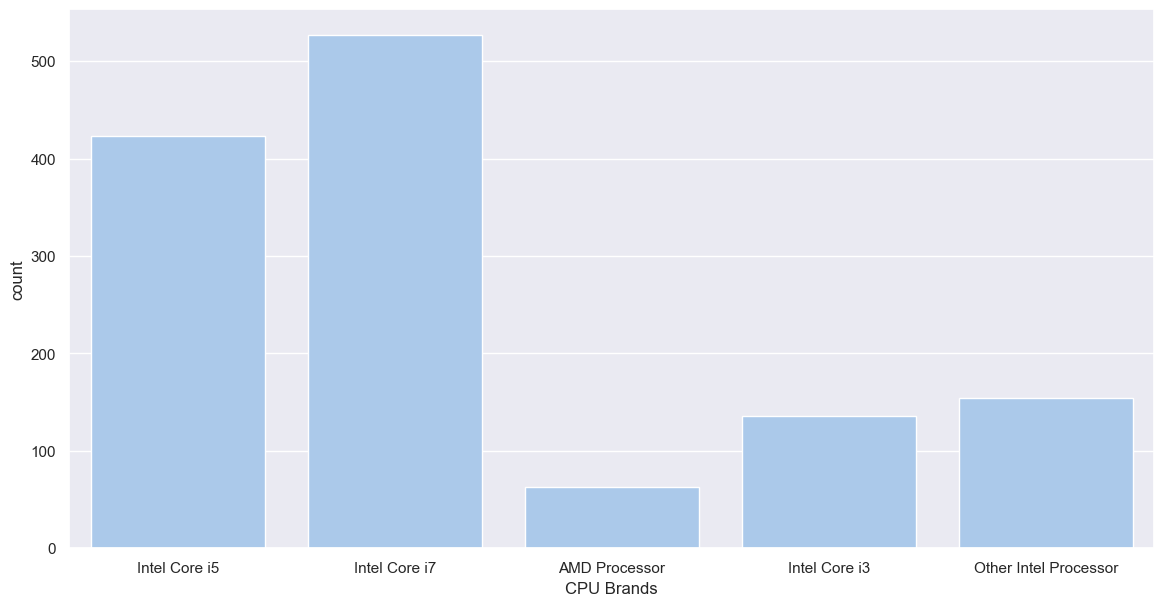

In [55]:
plt.figure(figsize=(14,7))
sns.countplot(x=laptop_df["CPU Brands"])

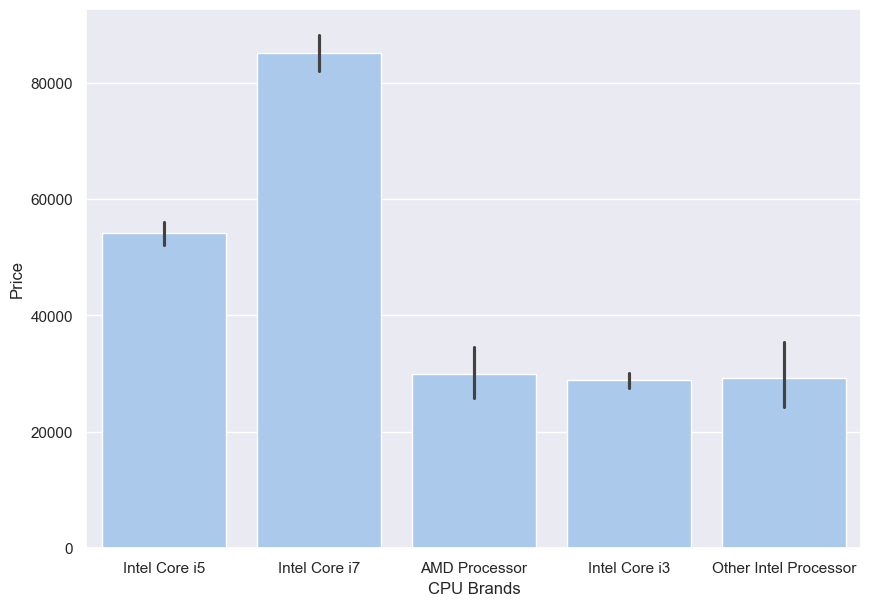

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x=laptop_df["CPU Brands"],y=laptop_df["Price"])
plt.show()

In [57]:
laptop_df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CpuName,CPU Brands
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5


In [58]:
laptop_df.drop(columns=["Cpu","CpuName"],axis=1,inplace=True)

In [59]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brands
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5


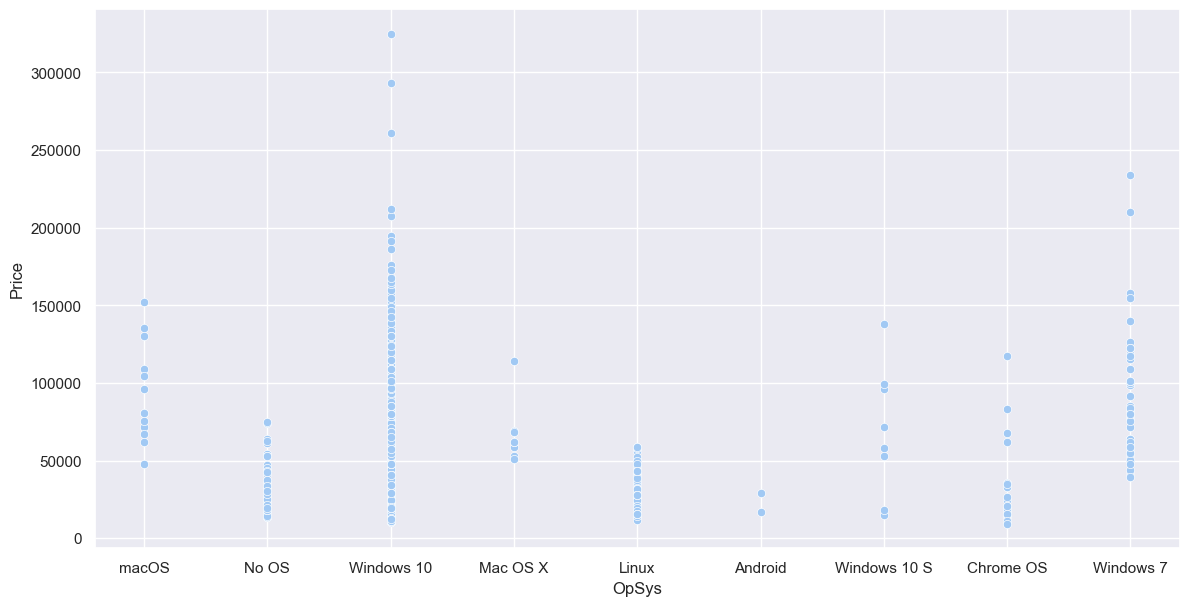

In [60]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=laptop_df["OpSys"],y=laptop_df["Price"])
plt.show()

In [61]:
def op_sys(text):
    if text=="macOS" or text=="Mac OS X":
        return "Mac"
    elif text=="Windows 10" or text=="Windows 10 S" or text=="Windows 7":
        return "Windows"
    else:
        return "Linux/No Os/Others"
    

In [62]:
laptop_df["os"]=laptop_df["OpSys"].apply(lambda x:op_sys(x))

In [63]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac


In [64]:
laptop_df.drop(columns=["OpSys"],axis=1,inplace=True)

In [65]:
laptop_df["Gpu Brand"]=laptop_df["Gpu"].apply(lambda x:x.split()[0])

In [66]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel


In [67]:
laptop_df["Gpu Brand"].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [68]:
laptop_df=laptop_df[laptop_df["Gpu Brand"]!="ARM"]

In [69]:
laptop_df.shape

(1302, 13)

In [70]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel


In [71]:
laptop_df["Gpu Brand"].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

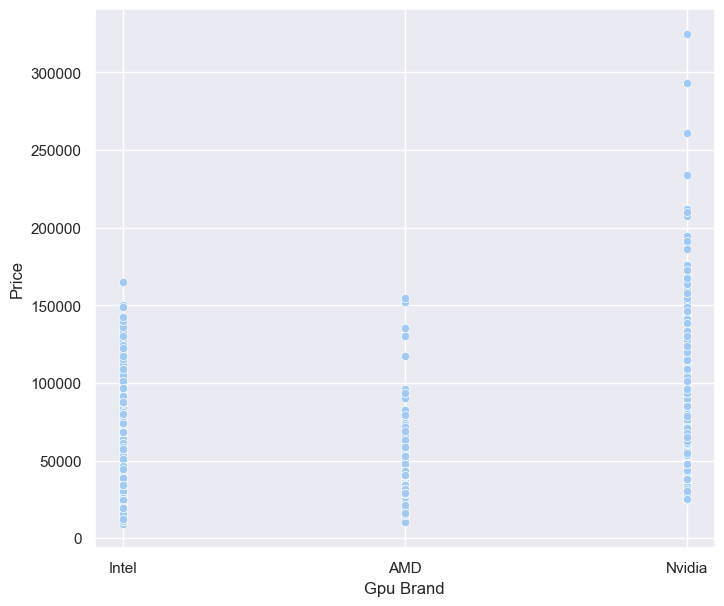

In [72]:
plt.figure(figsize=(8,7))
sns.scatterplot(x=laptop_df["Gpu Brand"],y=laptop_df["Price"])
plt.show()

In [73]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel


In [74]:
laptop_df.drop(columns=["Gpu"],axis=1,inplace=True)

In [75]:
laptop_df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [76]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Memory       1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   TouchScreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   ppi          1302 non-null   float64
 9   CPU Brands   1302 non-null   object 
 10  os           1302 non-null   object 
 11  Gpu Brand    1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(6)
memory usage: 122.1+ KB


In [77]:
laptop_df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [78]:
laptop_df['Memory'] = laptop_df['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_df["Memory"] = laptop_df["Memory"].str.replace('GB', '')
laptop_df["Memory"] = laptop_df["Memory"].str.replace('TB', '000')
new = laptop_df["Memory"].str.split("+", n = 1, expand = True)

laptop_df["first"]= new[0]
laptop_df["first"]=laptop_df["first"].str.strip()

laptop_df["second"]= new[1]

laptop_df["Layer1HDD"] = laptop_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer1SSD"] = laptop_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer1Hybrid"] = laptop_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer1Flash_Storage"] = laptop_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['first'] = laptop_df['first'].str.replace(r'\D', '')

laptop_df["second"].fillna("0", inplace = True)

laptop_df["Layer2HDD"] = laptop_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_df["Layer2SSD"] = laptop_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_df["Layer2Hybrid"] = laptop_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_df["Layer2Flash_Storage"] = laptop_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_df['second'] = laptop_df['second'].str.replace(r'\D', '')

C:\Users\SHADO\AppData\Local\Temp\ipykernel_10964\4066773687.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptop_df["second"].fillna("0", inplace = True)


In [79]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1302 non-null   object 
 1   TypeName             1302 non-null   object 
 2   Ram                  1302 non-null   int32  
 3   Memory               1302 non-null   object 
 4   Weight               1302 non-null   float32
 5   Price                1302 non-null   float64
 6   TouchScreen          1302 non-null   int64  
 7   IPS                  1302 non-null   int64  
 8   ppi                  1302 non-null   float64
 9   CPU Brands           1302 non-null   object 
 10  os                   1302 non-null   object 
 11  Gpu Brand            1302 non-null   object 
 12  first                1302 non-null   object 
 13  second               1302 non-null   object 
 14  Layer1HDD            1302 non-null   int64  
 15  Layer1SSD            1302 non-null   int64 

In [80]:
laptop_df['first'] = laptop_df['first'].str.replace(r'\D+', '')


In [81]:
laptop_df['first'].fillna("", inplace=True)
laptop_df['first'] = laptop_df['first'].str.replace(r'\D', '')

C:\Users\SHADO\AppData\Local\Temp\ipykernel_10964\1317312567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptop_df['first'].fillna("", inplace=True)


In [82]:
laptop_df["first"]=laptop_df["first"].apply(lambda x:x.split()[0])

In [83]:
laptop_df["first"].unique()

array(['128', '256', '512', '500', '1000', '32', '64', '2000', '16',
       '180', '240', '8', '508'], dtype=object)

In [84]:
laptop_df["first"]=laptop_df["first"].astype(int)

In [85]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1302 non-null   object 
 1   TypeName             1302 non-null   object 
 2   Ram                  1302 non-null   int32  
 3   Memory               1302 non-null   object 
 4   Weight               1302 non-null   float32
 5   Price                1302 non-null   float64
 6   TouchScreen          1302 non-null   int64  
 7   IPS                  1302 non-null   int64  
 8   ppi                  1302 non-null   float64
 9   CPU Brands           1302 non-null   object 
 10  os                   1302 non-null   object 
 11  Gpu Brand            1302 non-null   object 
 12  first                1302 non-null   int32  
 13  second               1302 non-null   object 
 14  Layer1HDD            1302 non-null   int64  
 15  Layer1SSD            1302 non-null   int64 

In [86]:
laptop_df["second"]=laptop_df["second"].apply(lambda x:x.strip())

In [87]:
laptop_df["second"].unique()

array(['0', '1000 HDD', '256 SSD', '2000 HDD', '500 HDD', '512 SSD',
       '1000 Hybrid'], dtype=object)

In [88]:
laptop_df["second"]=laptop_df["second"].apply(lambda x:x.split()[0])

In [89]:
laptop_df["second"]=laptop_df["second"].astype(int)

In [90]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1302 non-null   object 
 1   TypeName             1302 non-null   object 
 2   Ram                  1302 non-null   int32  
 3   Memory               1302 non-null   object 
 4   Weight               1302 non-null   float32
 5   Price                1302 non-null   float64
 6   TouchScreen          1302 non-null   int64  
 7   IPS                  1302 non-null   int64  
 8   ppi                  1302 non-null   float64
 9   CPU Brands           1302 non-null   object 
 10  os                   1302 non-null   object 
 11  Gpu Brand            1302 non-null   object 
 12  first                1302 non-null   int32  
 13  second               1302 non-null   int32  
 14  Layer1HDD            1302 non-null   int64  
 15  Layer1SSD            1302 non-null   int64 

In [91]:
np.random.seed(32)
laptop_df["first"].tail(5)


1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, dtype: int32

In [92]:
np.random.seed(32)

laptop_df["Layer1HDD"].tail(5)

1298    0
1299    0
1300    0
1301    1
1302    1
Name: Layer1HDD, dtype: int64

In [93]:
laptop_df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'ppi', 'CPU Brands', 'os', 'Gpu Brand', 'first',
       'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],
      dtype='object')

In [94]:
laptop_df["HDD"] = (laptop_df["first"] * laptop_df["Layer1HDD"] + laptop_df["second"] * laptop_df["Layer2HDD"])
laptop_df["SSD"] = (laptop_df["first"] * laptop_df["Layer1SSD"] + laptop_df["second"] * laptop_df["Layer2SSD"])
laptop_df["Hybrid"] = (laptop_df["first"] * laptop_df["Layer1Hybrid"] + laptop_df["second"] * laptop_df["Layer2Hybrid"])
laptop_df["Flash_Storage"] = (laptop_df["first"] * laptop_df["Layer1Flash_Storage"] + laptop_df["second"] * laptop_df["Layer2Flash_Storage"])

In [95]:
laptop_df.head(2)

,Company,TypeName,Ram,Memory,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,...,0,1,0,0,0,0,0,0,0,128


In [96]:
laptop_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'], inplace=True)

In [97]:
laptop_df.sample(5)

,Company,TypeName,Ram,Memory,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD,Hybrid,Flash_Storage
917,MSI,Gaming,16,256 SSD + 1000 HDD,2.7,85194.72,0,0,127.335675,Intel Core i7,Windows,Nvidia,1000,256,0,0
1209,Asus,Gaming,16,256 SSD + 1000 HDD,2.2,130482.72,0,0,141.211998,Intel Core i7,Windows,Nvidia,1000,256,0,0
239,Acer,Gaming,8,256 SSD,2.5,45074.88,0,1,141.211998,Intel Core i5,Windows,Nvidia,0,256,0,0
366,Dell,Notebook,8,128 SSD + 1000 HDD,2.8,57808.80,0,0,127.335675,Intel Core i5,Windows,AMD,1000,128,0,0
1208,Acer,Notebook,8,1000 HDD,3.3,33513.12,0,0,106.113062,Intel Core i3,Windows,Nvidia,1000,0,0,0


In [98]:
laptop_df.drop(columns=["Memory"],axis=1,inplace=True)

In [99]:
laptop_df.corr(numeric_only=True)["Price"]

Ram              0.742905
Weight           0.209867
Price            1.000000
TouchScreen      0.192917
IPS              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [100]:
laptop_df.drop(columns=["Flash_Storage","Hybrid"],inplace=True)

In [101]:
laptop_df.head(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0


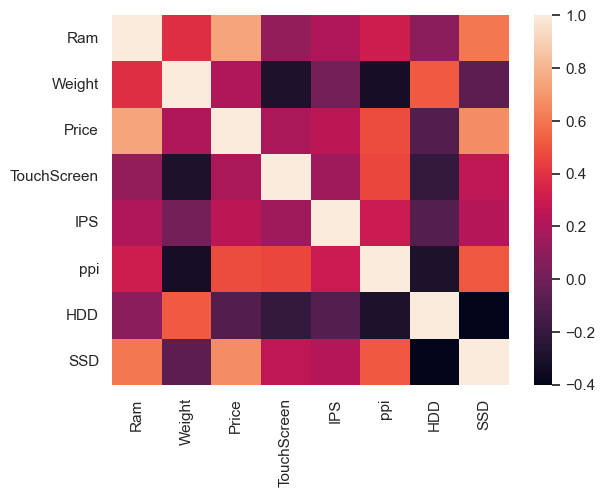

In [102]:
sns.heatmap(laptop_df.corr(numeric_only=True))
plt.show()

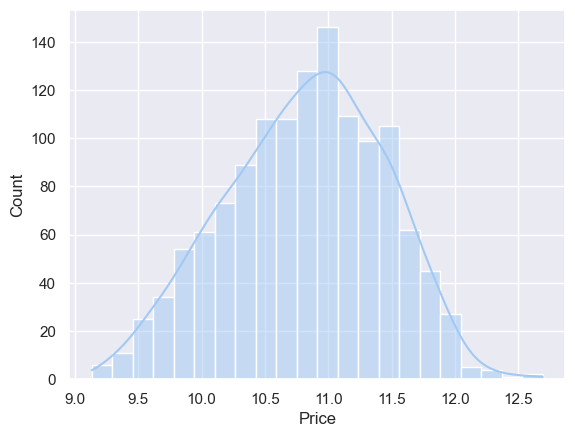

In [103]:
sns.histplot(np.log(laptop_df["Price"]),kde=True)
plt.show()

In [104]:
laptop_df.head(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0


In [105]:
X=laptop_df.drop(columns=["Price"],axis=1)
y=np.log(laptop_df["Price"])

In [106]:
y.head(2)

0    11.175755
1    10.776777
Name: Price, dtype: float64

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.23,random_state=32)

In [108]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [110]:
laptop_df.head(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Mac,Intel,0,0


In [111]:
X_train.head(2)

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD
593,Samsung,Notebook,16,2.5,0,0,141.211998,Intel Core i7,Windows,Nvidia,1000,128
1200,Dell,Notebook,4,2.3,0,0,100.454670,Intel Core i3,Windows,AMD,0,128


In [112]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [113]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 593 to 727
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1002 non-null   object 
 1   TypeName     1002 non-null   object 
 2   Ram          1002 non-null   int32  
 3   Weight       1002 non-null   float32
 4   TouchScreen  1002 non-null   int64  
 5   IPS          1002 non-null   int64  
 6   ppi          1002 non-null   float64
 7   CPU Brands   1002 non-null   object 
 8   os           1002 non-null   object 
 9   Gpu Brand    1002 non-null   object 
 10  HDD          1002 non-null   int64  
 11  SSD          1002 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(4), object(5)
memory usage: 93.9+ KB


In [114]:
laptop_df["HDD"].value_counts()

HDD
0       726
1000    408
500     134
2000     32
32        1
128       1
Name: count, dtype: int64

In [115]:
col_categories=["Company","TypeName","os","Gpu Brand","CPU Brands","TouchScreen","IPS"]
num_cat=["Ram","Weight","ppi","HDD","SSD"]

### **Linear Regreesion**

In [116]:
linear_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
            ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",LinearRegression())
])

In [117]:
linear_reg_Pipeline.fit(X_train,y_train)

Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['Ram', 'Weight', 'ppi',
                                                   'HDD', 'SSD']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'os',
                                                   'Gpu Brand', 'CPU Brands',
                                                   'TouchScreen', 'IPS'])])),
                ('linear_regression', LinearRegression())])

In [118]:
pred_linear_regression=linear_reg_Pipeline.predict(X_test)

In [119]:
r2_score_linear_regression=r2_score(y_test,pred_linear_regression)

In [120]:
mae_linear_legression=mean_absolute_error(y_test,pred_linear_regression)
mse_linear_regression=mean_squared_error(y_test,pred_linear_regression)

In [121]:
print(r2_score_linear_regression),print(mae_linear_legression),print(mse_linear_regression)

0.8056192855828532
0.21067309200525236
0.07452499775982824


(None, None, None)

### **Ridge**

In [122]:
ridge_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",Ridge(alpha=10))
])
ridge_reg_Pipeline.fit(X_train,y_train)
pred_ridge_regression=ridge_reg_Pipeline.predict(X_test)
r2_score_ridge_regression=r2_score(y_test,pred_ridge_regression)
mae_ridge_legression=mean_absolute_error(y_test,pred_ridge_regression)
mse_ridge_regression=mean_squared_error(y_test,pred_ridge_regression)
print(r2_score_ridge_regression),print(mae_ridge_legression),print(mse_ridge_regression)

0.8014304177004646
0.21452018178536433
0.07613099746245969


(None, None, None)

### **Lasso**

In [123]:
lasso_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",Lasso(alpha=0.001))
])
lasso_reg_Pipeline.fit(X_train,y_train)
pred_lasso_regression=lasso_reg_Pipeline.predict(X_test)
r2_score_lasso_regression=r2_score(y_test,pred_lasso_regression)
mae_lasso_legression=mean_absolute_error(y_test,pred_lasso_regression)
mse_lasso_regression=mean_squared_error(y_test,pred_lasso_regression)
print(r2_score_lasso_regression),print(mae_lasso_legression),print(mse_lasso_regression)

0.8009915596056476
0.2147372007835656
0.07629925437329156


(None, None, None)

### **Decision Treee Regressor**

In [124]:
decision_tree_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("Decision Tree",DecisionTreeRegressor(max_depth=8))
])
decision_tree_reg_Pipeline.fit(X_train,y_train)
pred_decision_regression=decision_tree_reg_Pipeline.predict(X_test)
r2_score_decision_regression=r2_score(y_test,pred_decision_regression)
mae_decision_legression=mean_absolute_error(y_test,pred_decision_regression)
mse_decision_regression=mean_squared_error(y_test,pred_decision_regression)
print(r2_score_decision_regression),print(mae_decision_legression),print(mse_decision_regression)

0.7788622555817809
0.21859158687631794
0.08478356485517415


(None, None, None)

### **XGRegressor**

In [125]:
xg_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))
])
xg_reg_Pipeline.fit(X_train,y_train)
pred_xg_regression=xg_reg_Pipeline.predict(X_test)
r2_score_xg_regression=r2_score(y_test,pred_xg_regression)
mae_xg_legression=mean_absolute_error(y_test,pred_xg_regression)
mse_xg_regression=mean_squared_error(y_test,pred_xg_regression)
print(r2_score_xg_regression),print(mae_xg_legression),print(mse_xg_regression)

0.8563425667732834
0.1715271039378437
0.05507784000849071


(None, None, None)

### **KNeighborrs**

In [126]:
kneighbors_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",KNeighborsRegressor(n_neighbors=3))
])
kneighbors_reg_Pipeline.fit(X_train,y_train)
pred_kneighbors_regression=kneighbors_reg_Pipeline.predict(X_test)
r2_score_neighbors_regression=r2_score(y_test,pred_kneighbors_regression)
mae_neighbors_legression=mean_absolute_error(y_test,pred_kneighbors_regression)
mse_neighbors_regression=mean_squared_error(y_test,pred_kneighbors_regression)
print(r2_score_neighbors_regression),print(mae_neighbors_legression),print(mse_neighbors_regression)

0.8245181089750258
0.20139151949305079
0.06727924410989305


(None, None, None)

### **AdaBoostRegressor**

In [127]:
adaboost_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",AdaBoostRegressor(n_estimators=15,learning_rate=1.0))
])
adaboost_reg_Pipeline.fit(X_train,y_train)
pred_adaboost_regression=adaboost_reg_Pipeline.predict(X_test)
r2_score_adaboost_regression=r2_score(y_test,pred_adaboost_regression)
mae_adaboost_legression=mean_absolute_error(y_test,pred_adaboost_regression)
mse_adaboost_regression=mean_squared_error(y_test,pred_adaboost_regression)
print(r2_score_adaboost_regression),print(mae_adaboost_legression),print(mse_adaboost_regression)

0.7575261997970038
0.24289600768198394
0.09296374628074372


(None, None, None)

###   **RandomForestRegressor**

In [128]:
random_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15))
])
random_reg_Pipeline.fit(X_train,y_train)
pred_random_regression=random_reg_Pipeline.predict(X_test)
r2_score_random_regression=r2_score(y_test,pred_random_regression)
mae_random_legression=mean_absolute_error(y_test,pred_random_regression)
mse_random_regression=mean_squared_error(y_test,pred_random_regression)
print(r2_score_random_regression),print(mae_random_legression),print(mse_random_regression)

0.8568522990826679
0.17656816355081756
0.05488241013094904


(None, None, None)

### **GradienBoostuingRegression**

In [129]:
gradient_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",GradientBoostingRegressor(n_estimators=500))
])
gradient_reg_Pipeline.fit(X_train,y_train)
pred_gradient_regression=gradient_reg_Pipeline.predict(X_test)
r2_score_gradient_regression=r2_score(y_test,pred_gradient_regression)
mae_gradient_legression=mean_absolute_error(y_test,pred_gradient_regression)
mse_gradient_regression=mean_squared_error(y_test,pred_gradient_regression)
print(r2_score_gradient_regression),print(mae_gradient_legression),print(mse_gradient_regression)

0.8779745433473443
0.16451699111492502
0.04678420341724491


(None, None, None)

In [130]:
gradient_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",GradientBoostingRegressor(n_estimators=500))
])
gradient_reg_Pipeline.fit(X_train,y_train)
pred_gradient_regression=gradient_reg_Pipeline.predict(X_test)
r2_score_gradient_regression=r2_score(y_test,pred_gradient_regression)
mae_gradient_legression=mean_absolute_error(y_test,pred_gradient_regression)
mse_gradient_regression=mean_squared_error(y_test,pred_gradient_regression)
print(r2_score_gradient_regression),print(mae_gradient_legression),print(mse_gradient_regression)

0.8754435573313849
0.1651175797843945
0.04775457605804474


(None, None, None)

### **ExtraTreesRegressor**

In [131]:
extra_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap=True))
])
extra_reg_Pipeline.fit(X_train,y_train)
pred_extra_regression=extra_reg_Pipeline.predict(X_test)
r2_score_extra_regression=r2_score(y_test,pred_extra_regression)
mae_extra_legression=mean_absolute_error(y_test,pred_extra_regression)
mse_extra_regression=mean_squared_error(y_test,pred_extra_regression)
print(r2_score_extra_regression),print(mae_extra_legression),print(mse_extra_regression)

0.834721589804058
0.18129943599155238
0.06336725938339285


(None, None, None)

In [132]:
extra_mlp_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",MLPRegressor(max_iter=1000))
])
extra_mlp_Pipeline.fit(X_train,y_train)
pred_mlp_regression=extra_mlp_Pipeline.predict(X_test)
r2_score_mlp_regression=r2_score(y_test,pred_mlp_regression)
mae_mlp_legression=mean_absolute_error(y_test,pred_mlp_regression)
mse_mlp_regression=mean_squared_error(y_test,pred_mlp_regression)
print(r2_score_mlp_regression),print(mae_mlp_legression),print(mse_mlp_regression)

0.8138204795519817
0.20581433120402892
0.07138068396301002


(None, None, None)

In [133]:
models={
    "Linear Regression":r2_score_linear_regression,
    "KNeighborsRegressor":r2_score_neighbors_regression,
    "Lasso":r2_score_lasso_regression,
    "Ridge":r2_score_ridge_regression,
    "DecisionTree":r2_score_decision_regression,
    "AdaBoost":r2_score_adaboost_regression,
    "GradientBoost":r2_score_gradient_regression,
    "XgRegression":r2_score_xg_regression,
    "MLP Regression":r2_score_mlp_regression,
    "Extra Trees Regression":r2_score_extra_regression,
    "random":r2_score_random_regression,
}

In [134]:
pd.Series(data=models).sort_values(ascending=False)

GradientBoost             0.875444
random                    0.856852
XgRegression              0.856343
Extra Trees Regression    0.834722
KNeighborsRegressor       0.824518
MLP Regression            0.813820
Linear Regression         0.805619
Ridge                     0.801430
Lasso                     0.800992
DecisionTree              0.778862
AdaBoost                  0.757526
dtype: float64

In [135]:
from sklearn.model_selection import RandomizedSearchCV


In [136]:

param_grid_mlp = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

In [137]:

param_grid_gradient = {'min_samples_split': range(200,1001,200),
          'max_depth': range(5,16,2),
          'min_samples_leaf': range(30,71,10),
          'max_features':range(7,20,2),
        }

In [138]:

param_grid_random = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
        #   'max_features': ['log2', 'sqrt'],
          "max_depth" : [int(x) for x in np.linspace(10, 110, num = 11)],
          "min_samples_split" : [2, 5, 10],
          "min_samples_leaf" : [1, 2, 4],
          "bootstrap" : [True, False]
                          }

In [139]:
random_estimator=RandomForestRegressor()

In [140]:
from sklearn.metrics import make_scorer

In [141]:
rsr_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("gsv",RandomizedSearchCV( random_estimator,
     param_distributions=param_grid_random,
    cv=4, scoring=make_scorer(r2_score), verbose=0,n_jobs=-1, n_iter=10,error_score='raise'))
])

In [142]:
rsr_Pipeline.fit(X,y)

Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['Ram', 'Weight', 'ppi',
                                                   'HDD', 'SSD']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'os',
                                                   'Gpu Brand', 'CPU Brands',
                                                   'TouchScreen', 'IPS'])])),
                ('gsv',
                 RandomizedSearchCV(cv=4, error_score='raise',
                                    estimator=RandomForestRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'bootstrap': [True,
                                                                       False],
                                                         'max_depth': [10, 20,
                                                                       30, 40,
                                                                       50, 60,
                                                                       70, 80,
                                                                       90, 100,
                                                                       110],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [200,
                                                                          400,
                                                                          600,
                                                                          800,
                                                                          1000,
                                                                          1200,
                                                                          1400,
                                                                          1600,
                                                                          1800,
                                                                          2000]},
                                    scoring=make_scorer(r2_score, response_method='predict')))])

In [143]:
rsr_Pipeline.named_steps['gsv'].best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'bootstrap': True}

In [144]:
rsr_Pipeline.named_steps['gsv'].best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=1800)

In [145]:
rsr_Pipeline.named_steps['gsv'].best_score_

0.8549254590338387

In [147]:
random_estmator_gsv=GradientBoostingRegressor()

In [151]:
gsv_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("gsv",RandomizedSearchCV( random_estmator_gsv,
     param_distributions=param_grid_gradient,
    cv=4, scoring=make_scorer(r2_score), verbose=0,n_jobs=-1, n_iter=10,error_score='raise'))])

In [152]:
gsv_Pipeline.fit(X,y)

Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['Ram', 'Weight', 'ppi',
                                                   'HDD', 'SSD']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'os',
                                                   'Gpu Brand', 'CPU Brands',
                                                   'TouchScreen', 'IPS'])])),
                ('gsv',
                 RandomizedSearchCV(cv=4, error_score='raise',
                                    estimator=GradientBoostingRegressor(),
                                    n_jobs=-1,
                                    param_distributions={'max_depth': range(5, 16, 2),
                                                         'max_features': range(7, 20, 2),
                                                         'min_samples_leaf': range(30, 71, 10),
                                                         'min_samples_split': range(200, 1001, 200)},
                                    scoring=make_scorer(r2_score, response_method='predict')))])

In [153]:
gsv_Pipeline.named_steps['gsv'].best_score_

0.8449381997507122

In [154]:
random_estimator_mlp=MLPRegressor()

In [155]:
mlp_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
             ("standard",StandardScaler(),num_cat),
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("gsv",RandomizedSearchCV( random_estimator_mlp,
     param_distributions=param_grid_mlp,
    cv=4, scoring=make_scorer(r2_score), verbose=0,n_jobs=-1, n_iter=10,error_score='raise'))])

In [156]:
mlp_Pipeline.fit(X,y)

Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['Ram', 'Weight', 'ppi',
                                                   'HDD', 'SSD']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'os',
                                                   'Gpu Brand', 'CPU Brands',
                                                   'TouchScreen', 'IPS'])])),
                ('gsv',
                 RandomizedSearchCV(cv=4, error_score='raise',
                                    estimator=MLPRegressor(), n_jobs=-1,
                                    param_distributions={'activation': ['relu',
                                                                        'tanh',
                                                                        'logistic'],
                                                         'alpha': [0.0001,
                                                                   0.05],
                                                         'hidden_layer_sizes': [(50,
                                                                                 50,
                                                                                 50),
                                                                                (50,
                                                                                 100,
                                                                                 50),
                                                                                (100,
                                                                                 1)],
                                                         'learning_rate': ['constant',
                                                                           'adaptive'],
                                                         'solver': ['adam']},
                                    scoring=make_scorer(r2_score, response_method='predict')))])

In [157]:
mlp_Pipeline.named_steps['gsv'].best_score_

0.8112217720288419

In [160]:
gradient_reg_Pipeline=Pipeline(steps=[
    ("one_hot",ColumnTransformer(
        transformers=[
            ("categorical",OneHotEncoder(),col_categories)
        ],
        remainder="passthrough"
    )),
    ("linear_regression",GradientBoostingRegressor(n_estimators=500))
])
gradient_reg_Pipeline.fit(X,y)


Pipeline(steps=[('one_hot',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'os',
                                                   'Gpu Brand', 'CPU Brands',
                                                   'TouchScreen', 'IPS'])])),
                ('linear_regression',
                 GradientBoostingRegressor(n_estimators=500))])

In [162]:
import pickle

In [163]:
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(gradient_reg_Pipeline, file)

In [164]:
with open('df.pkl', 'wb') as file:
    pickle.dump(laptop_df, file)

In [166]:
laptop_df.tail(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brands,os,Gpu Brand,HDD,SSD
1301,HP,Notebook,6,2.19,40705.92,0,0,100.45467,Intel Core i7,Windows,AMD,1000,0
1302,Asus,Notebook,4,2.20,19660.32,0,0,100.45467,Other Intel Processor,Windows,Intel,500,0
